In [58]:
# Do not change
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import seaborn as sns

# Exercise 7

## Task 1 (Getting to know Decision Trees)

Try to understand the following code. Experiment with the parameters of the DecisionTreeClassifier.

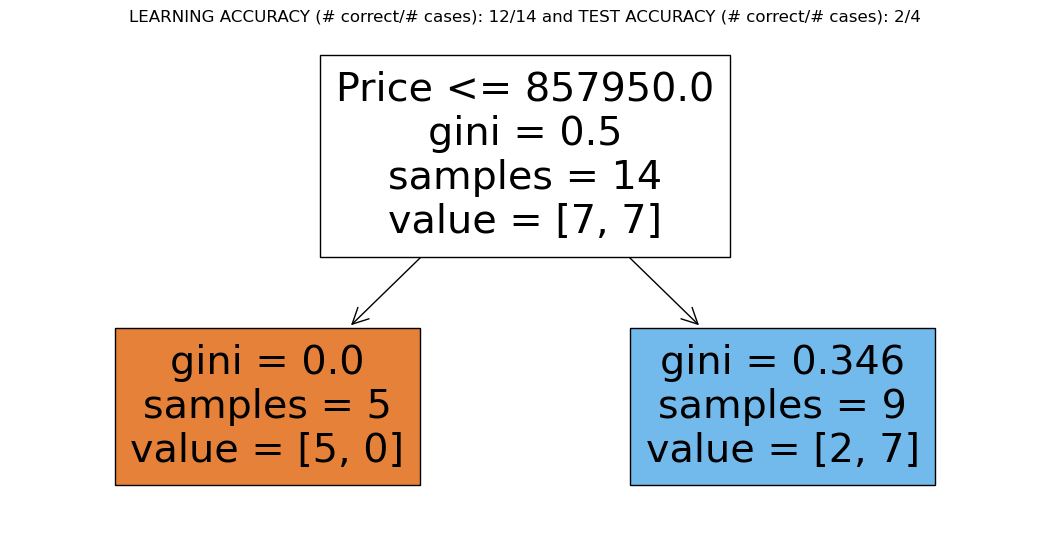

In [59]:
# Generating some data
house_prices = {"Price": [700000, 750000, 1272000, 980000, 550000, 900000, 950000, 1250000, 999999, 870000, 1100000, 1400000, 835900, 780000, 880000, 600000, 825000, 500000], "Pool": [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]}

df = pd.DataFrame(house_prices)
df.head()

X = df.drop(['Pool'], axis = 1)
y = df['Pool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

DT_classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 1, min_samples_split= 2)
DT_classifier.fit(X_train, y_train)

fig = plt.figure(figsize=(5.3*2, 4.6*1.2))
_ = tree.plot_tree(DT_classifier, feature_names=df.columns[:-1], filled=True)

plt.title(f'LEARNING ACCURACY (# correct/# cases): {sum(DT_classifier.predict(X_train)==y_train)}/{len(y_train)} and TEST ACCURACY (# correct/# cases): {sum(DT_classifier.predict(X_test)==y_test)}/{len(y_test)}')
plt.tight_layout()
plt.show()

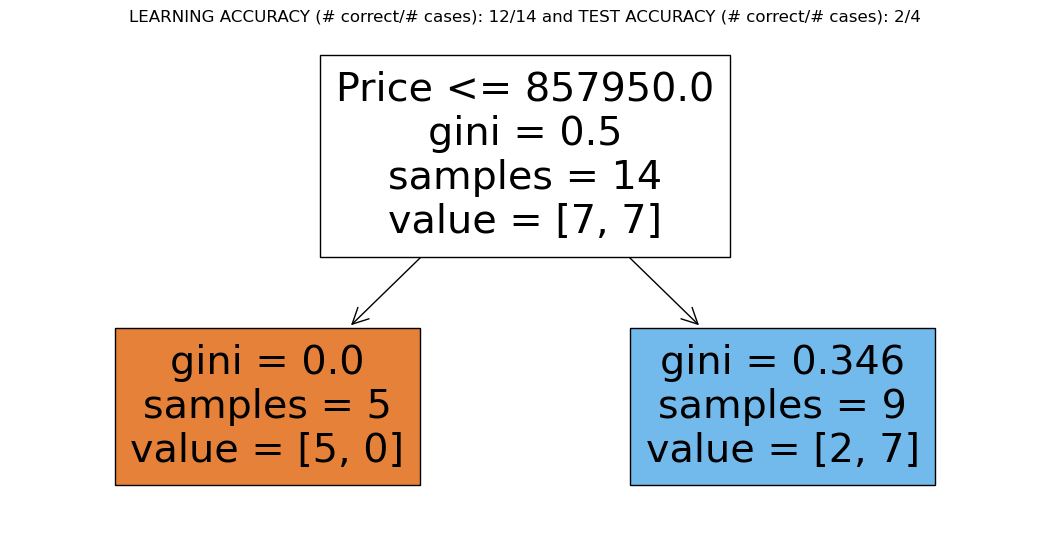

In [60]:
# Generating some data
house_prices = {"Price": [700000, 750000, 1272000, 980000, 550000, 900000, 950000, 1250000, 999999, 870000, 1100000, 1400000, 835900, 780000, 880000, 600000, 825000, 500000], "Pool": [1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]}

df = pd.DataFrame(house_prices)
df.head()

X = df.drop(['Pool'], axis = 1)
y = df['Pool']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

#criterion - Measures the quality of the split.“gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain.
#splitter - Detrmines the strategy used to split at the nodes.
#max_depth - Determines the maximum depth of the decesion tree.
#min_samples_split - Determines the minimum number of samples after which it stops splitting.
DT_classifier = DecisionTreeClassifier(criterion= 'gini',splitter= 'best', max_depth= 1, min_samples_split= 5)
DT_classifier.fit(X_train, y_train)

fig = plt.figure(figsize=(5.3*2, 4.6*1.2))
_ = tree.plot_tree(DT_classifier, feature_names=df.columns[:-1], filled=True)

plt.title(f'LEARNING ACCURACY (# correct/# cases): {sum(DT_classifier.predict(X_train)==y_train)}/{len(y_train)} and TEST ACCURACY (# correct/# cases): {sum(DT_classifier.predict(X_test)==y_test)}/{len(y_test)}')
plt.tight_layout()
plt.show()

## Task 2 (Decision Trees)

**Task:** 
Load the data: `auto_mpg.csv`

In [61]:
df1 = pd.read_csv("auto-mpg.csv")
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**Task:** Get to know the data employing descriptive statistics and visualization. Determine any missing data values.

In [62]:
df2 = pd.DataFrame(df1)
print (df2.describe())
print (df2.dtypes)

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
mpg             float64
cylinders         int

It is observed that the "horsepower" column has missing values.

**Task:** Clean the data.

In [63]:
df2['cylinders'] = df2['cylinders'].astype(float)
#df2['cylinders'].dtypes
df2 ['horsepower'] = pd.to_numeric(df2['horsepower'], errors='coerce')
df2 = df2.replace(np.nan, 0, regex=True)
#df2['horsepower'].dtypes
df2['weight'] = df2['weight'].astype(float)
#df2['weight'].dtypes
df2['model year'] = df2['model year'].astype(float)
#df2['model year'].dtypes
df2['origin'] = df2['origin'].astype(float)
#df2['origin'].dtypes
df3 = df2.drop(['car name'], axis = 1)
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


C:\Users\akhil\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


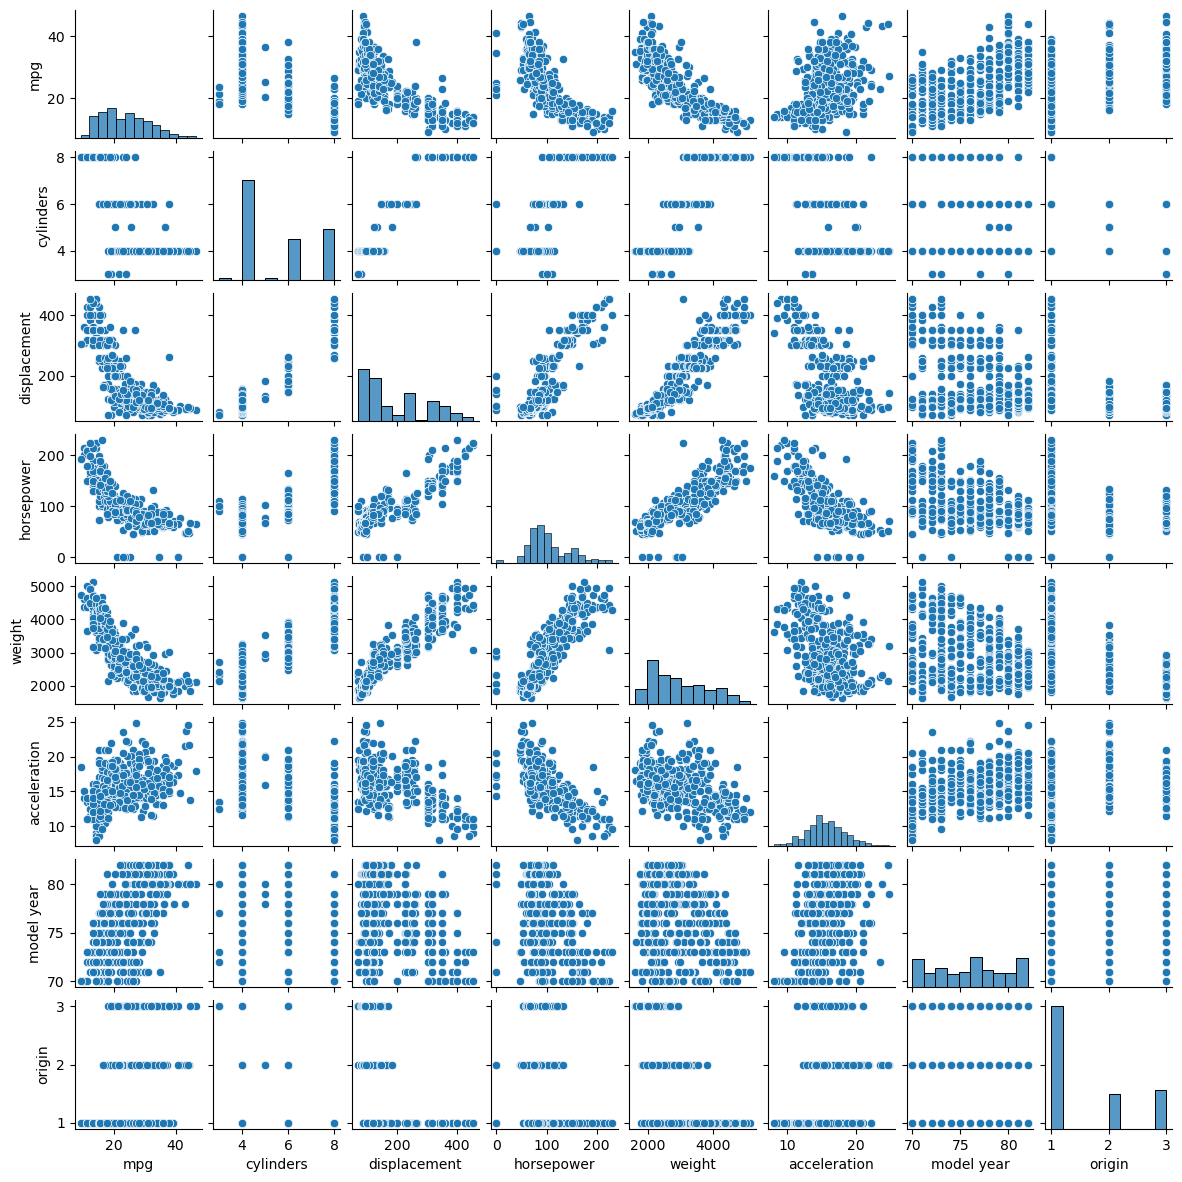

In [64]:
sns.pairplot(df3,size=1.5);

**Task:** Split the data in training data and test data.

In [65]:
x = df3.drop(['origin'], axis = 1)
y = df3["origin"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=2)

**Task:** Compute a decision tree that can predict the origin of a car based on the features available in the data.

In [66]:
DT_classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 2, min_samples_split= 2)
DT_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [67]:
DT_classifier.score(x_train, y_train)

0.7389937106918238

**Task:** Visualize the decision tree.

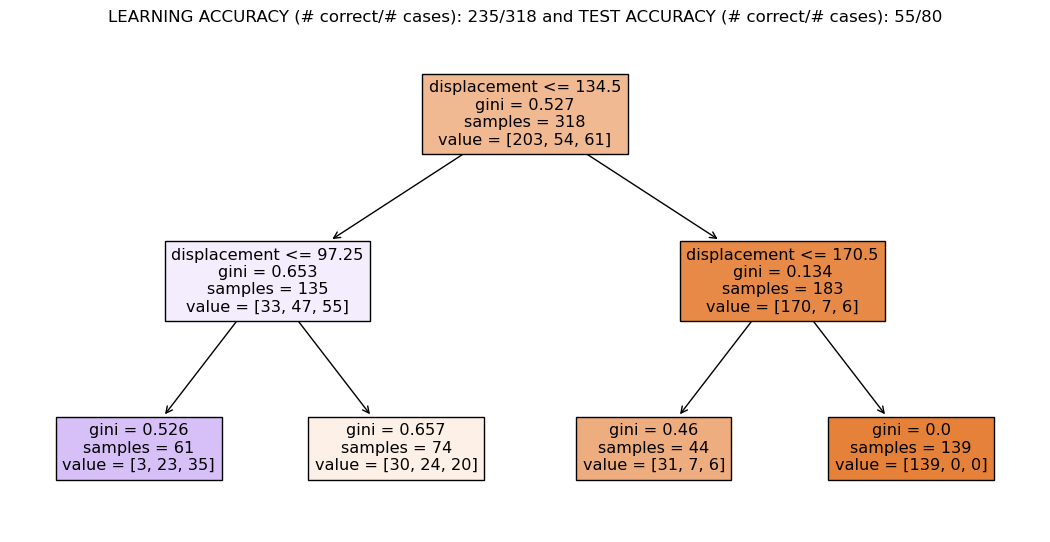

In [68]:
fig = plt.figure(figsize=(5.3*2, 4.6*1.2))
_ = tree.plot_tree(DT_classifier, feature_names=df3.columns[:-1], filled=True)

plt.title(f'LEARNING ACCURACY (# correct/# cases): {sum(DT_classifier.predict(x_train)==y_train)}/{len(y_train)} and TEST ACCURACY (# correct/# cases): {sum(DT_classifier.predict(x_test)==y_test)}/{len(y_test)}')
plt.tight_layout()
plt.show()

**Task:** Use the test data to evaluate your model w.r.t. unseen data.

In [69]:
y_pred = DT_classifier.predict(x_test)
#print(y_test)
#y_pred
print("Accuracy is ",(accuracy_score(y_test, y_pred)))

Accuracy is  0.6875


**Task:** Experiment with the parameters of the DecisionTreeClassifier class (pre-pruning) and check how the evaluation of the model w.r.t. the test data changes.

In [70]:
DT_classifier = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, min_samples_split= 2)
DT_classifier.fit(x_train, y_train)

DT_classifier.score(x_train, y_train)

0.8773584905660378

In [71]:
y_pred = DT_classifier.predict(x_test)
#print(y_test)
#y_pred
print("Accuracy is ",(accuracy_score(y_test, y_pred)))

Accuracy is  0.7625


# Task 3 (Decision Trees with simple majority voting)

**Task:** Take the cleaned data from Task 2. Split the data in random subsets and train for each of the subsets a DecisionTreeClassifier (the number of subsets should be kept flexible for later subtasks).

In [72]:
df3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [ ]:
subset[i] for i in range(n)

In [73]:
x = df3.drop(['origin'], axis = 1)
y = df3["origin"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

**Task:** Implement a majority vote function, i.e. a function that takes model predictions from several decision trees and outputs the combined prediction (where the combinator is a simple (weighted) majority vote). (*Do not use any additional Python modules!*)

**Task:** Experiment with the number of subsets/decision trees needed to get a well performing ensemble. (*Do not use any external Python modules!*)

**Task:** Experiment with introducing more randomness into the learning process as discussed in the lecture. Compare the obtained classification results with the results of the previous subtask.

## Voluntary Task 1

**Task:** For the iris dataset (see [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)) compute and visualize the decision tree boundaries. The following website might be helpful: [Link](https://www.kaggle.com/code/arthurtok/decision-boundaries-visualised-via-python-plotly/notebook)

## Voluntary Task 2

**Task:** Implement a boosted decision tree for the auto_mpg data employing [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier). Implement a radnom forest classifier for employing [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier). Compare the prediction results of both models for different training data subsets and parameters of the learning methods.